# Generate Annotations for Datasets

Objective: Use the Rendered.ai SDK to generate dataset annotations locally.

Reference the latest SDK Documentation at https://sdk.rendered.ai

## Two types of Annotations

Rendered.ai supports creation of two types of annotations:

1. Conversion of annotations from our Platform format to other popularly recognized formats, such as COCO, PASCAL, or KITTI. These type of annotations can get generated via the SDK or via the Platform UI.
2. Draw annotations, which include 2d bounding box, 3d bounding box, and segmentation drawings. These type of annotations are currently only able to be generated locally via the SDK.

This tutorial will guide you through generating both of these types of annotations. Note that you must have a dataset from Rendered.ai downloaded to your local. For all the annotation examples here, we are using the dataset from [getting started section's dataset folder](../1_getting_started/6e396ea6-e394-4566-8259-76bcadc16ab7). 

### Get the latest `anatools`

In [ ]:
pip install anatools --upgrade

### Set up imports and log into the SDK
These imports are required for this Notebook to run. 
Enter your credentials at the prompts. Logging in successfully will list the organizations and workspaces you have access to.

In [2]:
import os
import glob
import yaml, json
import wget
import time
from zipfile import ZipFile
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import pprint 
import anatools

pp = pprint.PrettyPrinter(indent=4)

In [1]:
sdk = anatools.client()

Enter your credentials for the Rendered.ai Platform.
Email: email@rendered.ai
········
These are your organizations and workspaces:
    User's Organization                          e8af8e7e-60d3-415f-a88d-9f4e191afec4              
	Toybox                                   c721696e-648f-4572-a9ca-5dd72f1e8f58              
The current workspaces is: c721696e-648f-4572-a9ca-5dd72f1e8f58


## Convert Annotations to a Problem Specific Format

Rendered.ai synthetic datasets can be used with various CV model domains. The `annotations()` anatools conversion classes are used to convert the default annotations into common formats. 

The current formats supported are:
- [COCO](https://cocodataset.org/#home)
- [PASCAL VOC](http://host.robots.ox.ac.uk/pascal/VOC/)
- [KITTI](https://docs.nvidia.com/tao/tao-toolkit/text/data_annotation_format.html#label-files)

Here, we will walk through how to generate COCO annotations. To get started on generating these types of annotations locally, first obtain a Channel's mappings file. For the Example Channel, this `default.yml` mappings file can be found under the `/mappings` folder. 

In [3]:
# Download the dataset and the default object mapping files
# Other availailable mappings can be used: https://github.com/Rendered-ai/ana/tree/main/ana/channels/example/mappings
mappings_file_name = 'default.yml'
if os.path.isfile(mappings_file_name):
    print("Found mapping file " + mappings_file_name)
else:
    download_filename = wget.download('https://raw.githubusercontent.com/Rendered-ai/ana/main/ana/channels/example/mappings/default.yml')
    print("Downloaded " + download_filename)

# Define dataDir here, default is the datasets in the Getting Started Section
data_dir = "../1_getting_started/6e396ea6-e394-4566-8259-76bcadc16ab7"
    
#Create the needed annotations directory
annotation_dir = os.path.join(data_dir, 'annotation_labels')
if not os.path.isdir(annotation_dir):
    os.mkdir(annotation_dir)

Found mapping file default.yml


Next, generate the COCO annotations with `annotations().dump_coco()`. Some sample output of the COCO annotations for an Example channel dataset is below. It's quite a long annotation so it has been modified for brevity.

In [6]:
# Create the annotations
from anatools import annotations

annotations().dump_coco(data_dir, annotation_dir, mappings_file_name)
print("Created Annotation Labels")

# # View some kitti labels
filename = os.listdir(os.path.join(data_dir, 'annotation_labels'))[0]
filepath = os.path.join(data_dir, 'annotation_labels', filename)
print(filepath)
with open(filepath) as fin:
    for i in range(3):
        print(fin.readline())

Created Annotation Labels
../1_getting_started/6e396ea6-e394-4566-8259-76bcadc16ab7/annotation_labels/coco.json
{"info": {"description": "Rendered.AI Synthetic Dataset", "url": "https://rendered.ai/", "contributor": "info@rendered.ai", "version": "1.0", "year": "2022", "date_created": "2022-06-16T20:58:52.048879"}, "licenses": [{"id": 0, "url": "https://rendered.ai/", "name": "Rendered.AI License"}], "images": [{"id": 0, "file_name": "0000000000-250-RGBCamera.png", "date_captured": "2022-04-11T21:48:47.334134", "license": 0}], "categories": [{"id": 0, "name": "BubbleBottle", "supercategory": "none"}, {"id": 1, "name": "Playdough", "supercategory": "none"}, {"id": 2, "name": "YoYo", "supercategory": "none"}, {"id": 3, "name": "Skateboard", "supercategory": "none"}, {"id": 4, "name": "RubiksCube", "supercategory": "none"}], "annotations": [{"id": 0, "image_id": 0, "category_id": 0, "segmentation": [[179, 360, 178, 361, 177, 361, 176, 361, 175, 361, 174, 362, 173, 362, 172, 362, 171, 363,

## Draw Annotations

There are three types of drawing annotations.

- Draw 2d box
- Draw 3d box
- Draw segmentation

The 2d Example can be found in the [Generate Synthetic Data with the Example Channel Notebook](../1_getting_started/Generate%20Synthetic%20Data%20with%20the%20Example%20Channel.ipynb)



### Create an image Annotated with 3d Bounding Boxes
This example will walk through how to generate images with 3d bounding boxes on your local system.

Use the `bounding_box_3d` function to generate the annotated image from the single image file within the dataset. Here, we will choose to filter the drawings on the PlayDough type and set line thickness=2.

In [17]:
from anatools import annotations

# Define dataDir here, default is the datasets in the Getting Started Section
data_dir = "../1_getting_started/6e396ea6-e394-4566-8259-76bcadc16ab7"

#Create the needed annotations directory
draw_dir = os.path.join(data_dir, 'draw_annotations')
if not os.path.isdir(draw_dir):
    os.mkdir(draw_dir)
    
annotations = annotations()
annotations.bounding_box_3d(image_path=glob.glob(data_dir+"/images/*.png")[0], 
                                out_dir=draw_dir, object_types=['PlayDough'], line_thickness=2)

Image saved to ../1_getting_started/6e396ea6-e394-4566-8259-76bcadc16ab7/draw_annotations/0000000000-250-RGBCamera-annotated-box_3d.png


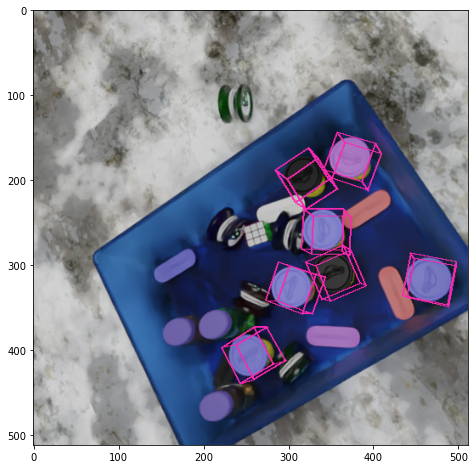

In [18]:
image_file_name = glob.glob(draw_dir+"/*3d.png")[0].split('/')[4]
annotated_image_3d = Image.open(draw_dir+"/"+image_file_name)
plt.figure(figsize = (8,8))
plt.imshow(np.asarray(annotated_image_3d))

### Create an image Annotated with Segmentation
This example will walk through how to generate images with segmentation on your local system.

Use the `segmentation` function to generate the annotated image from the single image file within the dataset. Here, we will choose to filter the drawings on the Skateboard type and set line thickness=2. Note that each skateboard in the resulting image has a green outline.

Image saved to ../1_getting_started/6e396ea6-e394-4566-8259-76bcadc16ab7/draw_annotations/0000000000-250-RGBCamera-annotated-segmentation.png


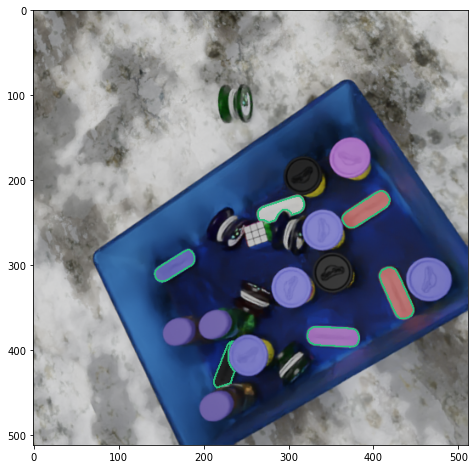

In [5]:
from anatools import annotations

# Define data_dir here, default is the datasets in the Getting Started Section
data_dir = "../1_getting_started/6e396ea6-e394-4566-8259-76bcadc16ab7"


#Create the needed annotations directory
draw_dir = os.path.join(data_dir, 'draw_annotations')
if not os.path.isdir(draw_dir):
    os.mkdir(draw_dir)

annotations = annotations()
annotations.segmentation(image_path=glob.glob(data_dir+"/images/*.png")[0], 
                                out_dir=draw_dir, object_types=['Skateboard'], line_thickness=2)


image_file_name = glob.glob(draw_dir+"/*segmentation.png")[0].split('/')[4]
annotated_image_segmentation = Image.open(draw_dir+"/"+image_file_name)
plt.figure(figsize = (8,8))
plt.imshow(np.asarray(annotated_image_segmentation))